<a href="https://www.kaggle.com/code/abubakrbadrelmaarif/plant-disease-recognition-final?scriptVersionId=115339951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.4.1
keras version 2.4.0
gpu is  available


In [2]:
img_width, img_height = 120,120
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/'
validation_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/'
eval_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/'
raspberry_data_dir = '/kaggle/input/university-plants1/'
raspberry_data_dir2 = '/kaggle/input/raspberry-pi-photos/'

nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 20
batch_size = 128
num_of_class = 3

In [3]:
train_datagen = ImageDataGenerator( #Image Augmentation # Research on other parameters
                rescale = 1. / 255, 
                shear_range = 0.25, 
                zoom_range = 0.25,
                rotation_range=10) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) #Image Augmentation


  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size =(img_width, img_height), 
                                                    batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                    shuffle=False)
  
validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False)

eval_generator = test_datagen.flow_from_directory(eval_data_dir, 
                                                  target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                  shuffle=False)


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


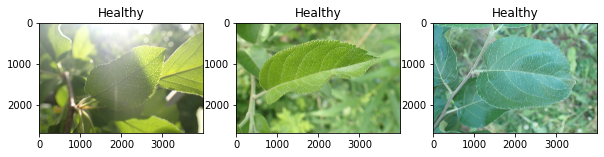

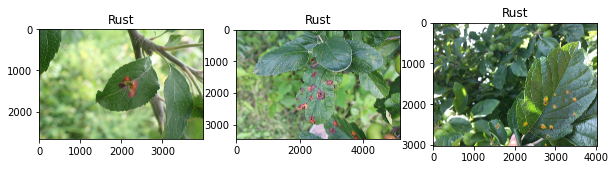

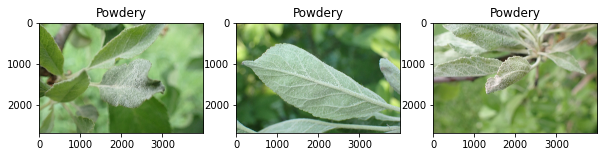

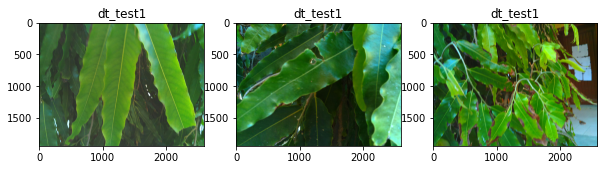

In [26]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
    

plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')
plot_images(raspberry_data_dir, 'dt_test1')

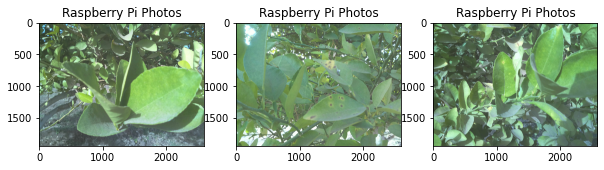

In [34]:
plot_images(raspberry_data_dir2, 'Raspberry Pi Photos')

**Building Model**

In [4]:

    
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [7]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 116, 116, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 114, 114, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 114, 114, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 1663488)           0

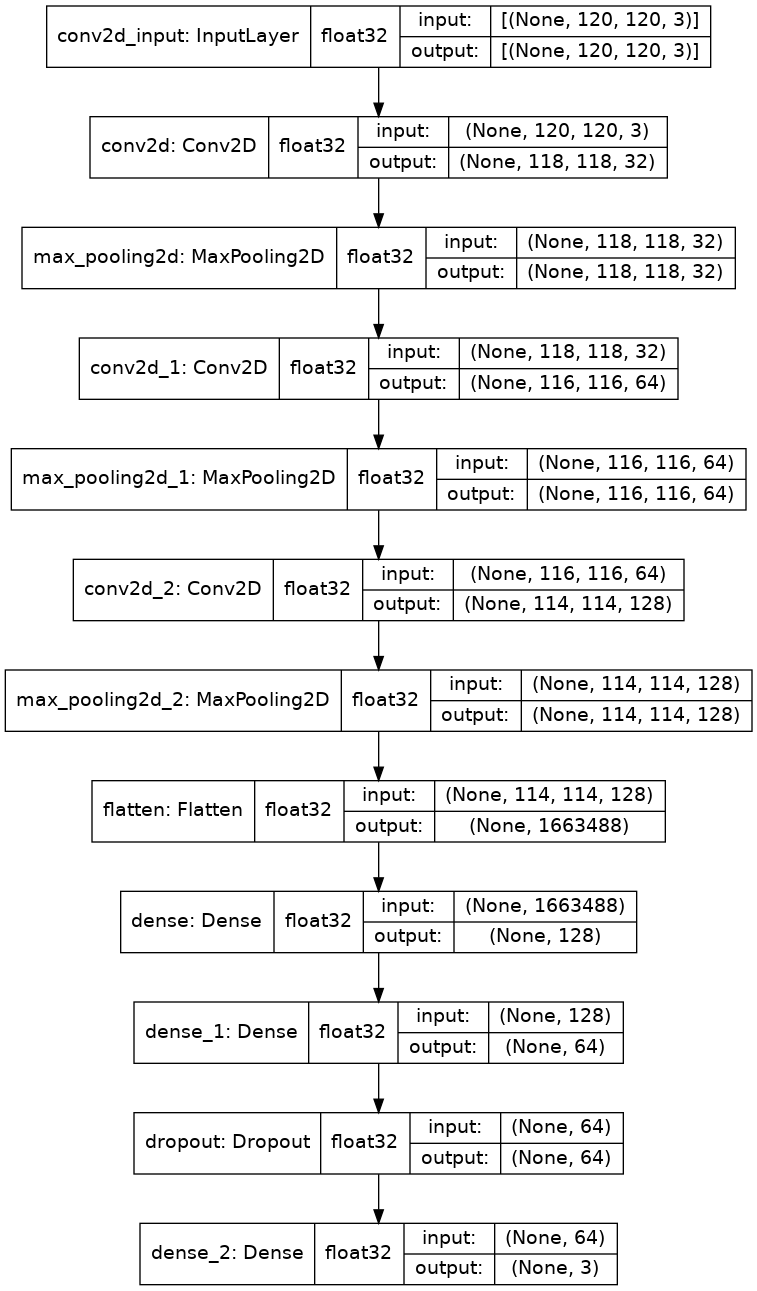

In [8]:
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [5]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer = "rmsprop", 
                   metrics =['accuracy']) 

In [ ]:
# # Include the epoch in the file name (uses `str.format`)
# checkpoint_path = "training_8/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)



# # Create a callback that saves the best model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=2*batch_size
#     )

# # Save the weights using the `checkpoint_path` format
# model3.save_weights(checkpoint_path.format(epoch=0))

In [6]:
checkpoint_dir = os.path.dirname("/kaggle/input/plantdiseasecheckpoints/training_8")
latest = tf.train.latest_checkpoint(checkpoint_dir)
model3.load_weights("/kaggle/input/plantdiseasecheckpoints/training_8/cp-0004.ckpt")

In [11]:
loss, acc = model3.evaluate(eval_generator, verbose=1)

1/1 [==============================] - 16s 16s/step - loss: 0.3452 - accuracy: 0.9000


In [ ]:

H = model3.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size)

In [ ]:
# save checkpoint manually
checkpoint_path = "training_8/cp-0003.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model3.save_weights(checkpoint_path)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [ ]:
# model3.save('./'+NAME+'.hdf5')

In [ ]:
validation_generator.class_indices

**visualise results**

Classification Report
              precision    recall  f1-score   support

     Healthy       0.88      0.75      0.81        20
     Powdery       0.83      0.95      0.88        20
        Rust       0.95      0.95      0.95        20

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



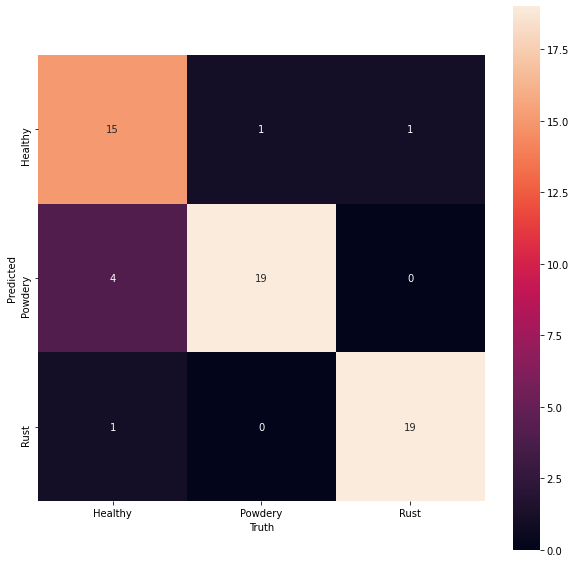

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

Classification Report
              precision    recall  f1-score   support

     Healthy       0.84      0.94      0.89        50
     Powdery       0.93      0.76      0.84        50
        Rust       0.89      0.94      0.91        50

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



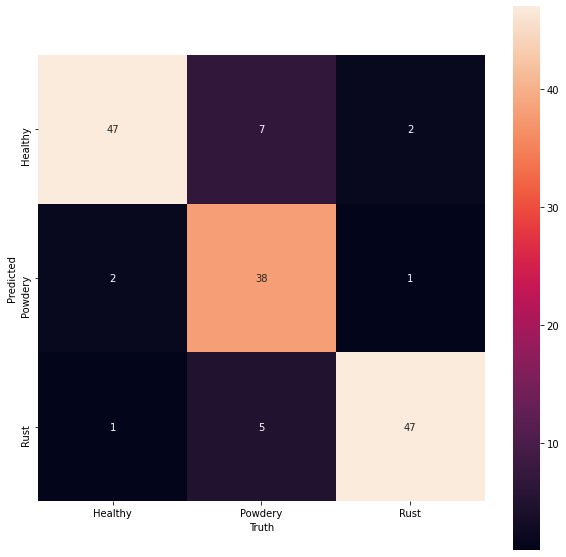

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)

In [7]:
testing_data_dir = '/kaggle/input/dt-test-cleaned/'

testing_generator = test_datagen.flow_from_directory(testing_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False)

Y_pred = model3.predict(testing_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

Found 52 images belonging to 1 classes.


In [ ]:
Y_pred

In [8]:
print(y_pred)

[2 2 2 0 0 0 0 0 0 2 2 2 2 0 0 2 2 2 0 2 2 2 2 0 2 2 2 1 2 2 0 0 2 2 0 1 1
 1 0 2 0 2 0 0 2 0 0 2 2 0 2 2]


In [11]:
!pip install openpyxl
import pandas as pd

df = pd.DataFrame(y_pred)
df.to_excel("dt_test2_results1.xlsx")

     |████████████████████████████████| 242 kB 896 kB/s eta 0:00:01


In [18]:
# import pandas as pd
import pandas as pd
import os

img_arr = os.listdir("/kaggle/input/university-plants1/dt_test1/")
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(img_arr,y_pred)),
               columns =['Name of image', 'Prediction'])
df

,Name of image,Prediction
0,Capture 2022-11-19_16-03-38.jpg,2
1,Capture 2022-11-19_16-07-20.jpg,2
2,Capture 2022-11-19_16-13-19.jpg,2
3,Capture 2022-11-19_16-28-07.jpg,0
4,Capture 2022-11-19_15-56-40.jpg,0
...,...,...
79,Capture 2022-11-19_16-08-14.jpg,1
80,Capture 2022-11-19_16-08-27.jpg,2
81,Capture 2022-11-19_16-09-40.jpg,1
82,Capture 2022-11-19_16-03-02.jpg,2
